<a href="https://colab.research.google.com/github/kigit2017/PCA/blob/main/Housing_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA ->  
It is used for reducing the number of features in a dataset while preserving as much of the original dataset.PCA acheives this by transforming the original features into a new set of uncorrelated fearures, known as the principal componenet. This PC is the linear combination of the original features.

#### Key Concepts in PCA:
- 1. Variance : Variance measures the spread or dispersion of data points.in PCA, the goal is to preserve as much variance as possible while reducing the dimensionality of the data.
- 2. Covariance :  it measures the degree to whihc two variables changes together.
+ve covariance indicates that the variables tend to increase or decrease together,
-ve indicates an iverse realtionship.

#### Process in PCA
- 1. Standarization : 1st step in PCA is standarizee the data, which means transforming it to have a mean of O and a standard deviation of 1 for each features.
The step enseure that each feature contributes equally to the analysis, especially when features have different units or scales.

- 2. Covariance Matrix : PCA claculates the covariance matrix of the standardized data.It represents the relationship among all paris of features.

- 3. Eigen Value Decomposition : PCA calculates the covariance matrix of the standarized data. The covariance matrix represents the realtioship and varaince among all pairs of features.
    - Eginvalue:  These represents amount of variance that each principal component captures larger eigenvalyes corresponds to principal componenet that captutre more variance.
    - Eigenvector(Principal Components) : These are the direction in the original features space along which the data varies the most. Each eigenvector corresponds to our PCA.
- 4. Selecting Principal Componenets :  PCA allows you to choose a subset of the principal componenets (typically fewer than the original features) to retain most of the variance in the data.
You can decide the number of principal componenets to keep based on the explained varaince or domain-specific requirements.
- 5. Projection : The selected principal componenet are used to project the original data onto a lower-dimesional subspace. This results in a new dataset with reduced dimesionality while retaining the most important information
- 6. Reconstruction : You can recosntruct the original data from the reduced-dimensional representation  y reversing the projection. However , some information may be lost during the dimensionality reduction.

#### Advantages of PCA:
- Dimensionality Reduction : PCA is used to reduce the dimensionality of high-dimesional data, making it easier to visulaize and analyze.
- Noise Reduction : By removin the uncessary components from our data and keeping only useful components help us to reduce the noise in our dataset.
- Visulization : PCA can be used to project data into lower dimension, allowing for easier visulization and interpretation
- Feature Engineering : In some cases, PCA can be used for feature engineering by creating new features that capture the most important information in the data.


PCA is not ML model, it is a dimsionality reduction technique while preprocessing  step in variousML and data analysis task.
It applies on the input data to reduce its dimensionality before feedin it into a machine learning model.

### PCA helps in  Anomaly Detection Models
- Isolation Forest
- One-class SVM
- Autoencoders



In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


House Prediction -PCA

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [313]:
data=pd.read_csv('/content/train.csv')

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [315]:
data.shape

(1460, 81)

In [316]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


include numerical columns

In [317]:
data_num = data.select_dtypes(include=['float64','int'])


In [318]:
data_num.shape

(1460, 38)

check for missing values, miss_val has columns with no missing values as the count is zero

In [319]:
miss_val=data_num.isna().sum()

In [320]:
miss_val=miss_val[miss_val==0]

In [321]:
miss_val.drop('Id')

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Get column names list from miss_val .
Get data ready for train,test

In [322]:
li= list(miss_val.index)

Filling missing values to mean

In [323]:
columns = ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtHalfBath','BsmtFullBath','GarageArea','GarageCars','TotalBsmtSF',\
                'BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']

for column in columns:
    data_num[column] = data_num[column].fillna(data_num[column].mean())
#data_num_new = pd.DataFrame([columns])
#data_num_new=data_num.astype('float64')
#print(data_num_new)

# PCA

In [324]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [325]:
X = data_num.drop(['SalePrice'],axis=1)

In [326]:
y = data['SalePrice']

In [327]:
arr = y.values
arr = arr.reshape(1460,1)

In [328]:
from pandas.core import series
arr.shape
y = arr

In [329]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [330]:
# Feature selection -> You have to find most important features
#

In [331]:
pca = PCA(n_components=15)
pcax = pca.fit_transform(X)
pca.components_.shape

(15, 37)

Text(0, 0.5, 'Cumcum variance ratio')

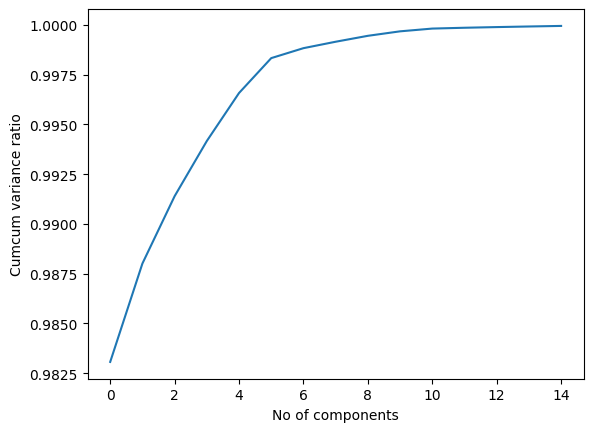

In [332]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Cumcum variance ratio')

Threshold for Variance (90% - industry standard)- 4 components has 90 percent variance.


In [333]:
li = LinearRegression()
li.fit(pcax,y)

LinearRegression()

In [334]:
y_pred = li.predict(pcax)
y_pred

array([[203050.62293262],
       [184744.73460518],
       [210649.20655023],
       ...,
       [205643.94528097],
       [116871.55528144],
       [184063.91173233]])

In [335]:
y_pred_new = np.round(y_pred)
y_pred_new

array([[203051.],
       [184745.],
       [210649.],
       ...,
       [205644.],
       [116872.],
       [184064.]])

In [336]:
from sklearn.metrics import accuracy_score,f1_score

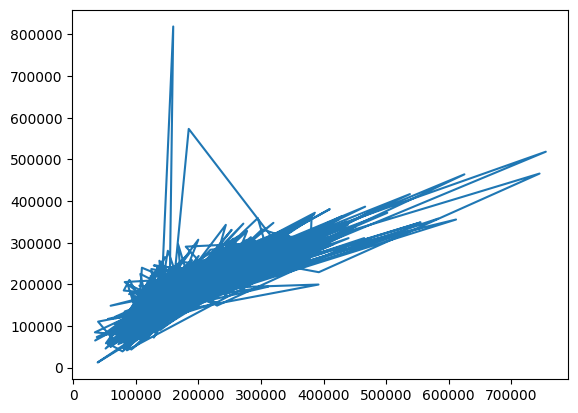

In [337]:
import matplotlib.pyplot as plt
plt.plot(y,y_pred)
plt.show()

In [338]:
accuracy = accuracy_score(y,y_pred_new)
print("Accuracy",accuracy)



Accuracy 0.0


In [339]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_pred = li.predict(pcax)



In [340]:
print(mean_absolute_error(df_pred,y))
print(mean_squared_error(df_pred,y))
print(r2_score(df_pred,y))


26806.47687921224
1904884092.4444666
0.5672591044365379
